<a href="https://colab.research.google.com/github/mazekehs/GeoAI/blob/main/Project_GeoAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing the libraries

In [1]:
!pip install geopandas folium matplotlib

# Importing the libraries

In [2]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

# Adding the Durgapur Buildings dataset in geojson format

In [3]:
geojson_file = '/content/drive/MyDrive/geoAI/OSM_Project.geojson'
gdf = gpd.read_file(geojson_file)

# Display the first few rows to check the data
print(gdf.head())

    osm_id osm_way_id  osm_version             osm_timestamp  osm_uid  \
0  5379675       None            2 2017-08-21 22:18:27+00:00  6396128   
1  5379676       None            3 2017-08-21 22:18:27+00:00  6396128   
2  5379677       None            2 2017-08-21 22:18:28+00:00  6396128   
3  5379768       None            2 2017-08-21 22:18:28+00:00  6396128   
4  5379769       None            2 2017-08-21 22:18:27+00:00  6396128   

      osm_user  osm_changeset  \
0  Pradeep Jha       51321279   
1  Pradeep Jha       51321279   
2  Pradeep Jha       51321279   
3  Pradeep Jha       51321279   
4  Pradeep Jha       51321279   

                                          other_tags  \
0  "building"=>"yes","name"=>"Preetilata Hall Of ...   
1  "building"=>"university","building:levels"=>"3...   
2  "building"=>"yes","name"=>"Hall 10","tourism"=...   
3  "building"=>"yes","name"=>"Shri Aurobindo hall...   
4  "building"=>"yes","name"=>"Doctor Meghnad Saha...   

                         

In [4]:
# Count the total number of buildings
building_count = len(gdf)
print(f"Total number of buildings: {building_count}")

Total number of buildings: 152


# Visualizing the footprints

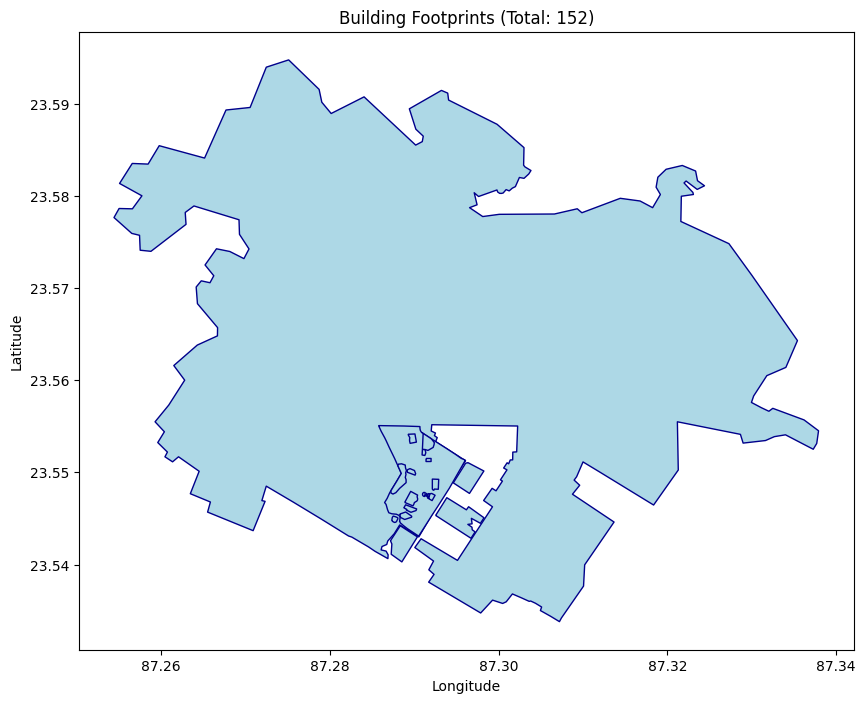

In [5]:
import matplotlib.pyplot as plt

# Plot building footprints
gdf.plot(figsize=(10, 10), color='lightblue', edgecolor='darkblue')
plt.title(f"Building Footprints (Total: {building_count})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Data Cleaning and Data Preprocessing

In [8]:
import geopandas as gpd
import pandas as pd
from shapely.validation import make_valid

# Load GeoJSON
geojson_file = '/content/drive/MyDrive/geoAI/OSM_Project.geojson'
gdf = gpd.read_file(geojson_file)

# Display original DataFrame
print("Original DataFrame:")
print(gdf.head())

# 1. Drop unnecessary columns
columns_to_drop = ['osm_version', 'osm_uid', 'osm_user', 'osm_changeset']
gdf = gdf.drop(columns=columns_to_drop, errors='ignore')

def parse_other_tags(other_tags):
    # Convert "key"=>"value" pairs to a dictionary
    if pd.isna(other_tags):  # Handle missing values
        return {}
    tags = {}
    try:
        for item in other_tags.split(","):
            if "=>" in item:  # Check if the format is valid
                key, value = item.split("=>", 1)  # Split only at the first "=>"
                tags[key.strip('"')] = value.strip('"')
    except Exception as e:
        print(f"Error parsing: {other_tags} -> {e}")
    return tags

# Apply parsing function
gdf['parsed_tags'] = gdf['other_tags'].apply(parse_other_tags)

# Extract specific attributes (e.g., building, name)
gdf['building'] = gdf['parsed_tags'].apply(lambda x: x.get('building', None))
gdf['name'] = gdf['parsed_tags'].apply(lambda x: x.get('name', None))

# 3. Convert timestamps
gdf['osm_timestamp'] = pd.to_datetime(gdf['osm_timestamp'])

# 4. Filter for buildings
gdf = gdf[gdf['building'] == 'yes']

# 5. Validate and fix geometry
gdf['geometry'] = gdf['geometry'].apply(make_valid)
gdf = gdf[gdf.is_valid]

# Drop unnecessary columns after processing
gdf = gdf.drop(columns=['other_tags', 'parsed_tags'], errors='ignore')

# Display cleaned DataFrame
print("\nCleaned DataFrame:")
print(gdf.head())


Original DataFrame:
    osm_id osm_way_id  osm_version             osm_timestamp  osm_uid  \
0  5379675       None            2 2017-08-21 22:18:27+00:00  6396128   
1  5379676       None            3 2017-08-21 22:18:27+00:00  6396128   
2  5379677       None            2 2017-08-21 22:18:28+00:00  6396128   
3  5379768       None            2 2017-08-21 22:18:28+00:00  6396128   
4  5379769       None            2 2017-08-21 22:18:27+00:00  6396128   

      osm_user  osm_changeset  \
0  Pradeep Jha       51321279   
1  Pradeep Jha       51321279   
2  Pradeep Jha       51321279   
3  Pradeep Jha       51321279   
4  Pradeep Jha       51321279   

                                          other_tags  \
0  "building"=>"yes","name"=>"Preetilata Hall Of ...   
1  "building"=>"university","building:levels"=>"3...   
2  "building"=>"yes","name"=>"Hall 10","tourism"=...   
3  "building"=>"yes","name"=>"Shri Aurobindo hall...   
4  "building"=>"yes","name"=>"Doctor Meghnad Saha...   

     

# Dyanamic Visualization using Folium Library

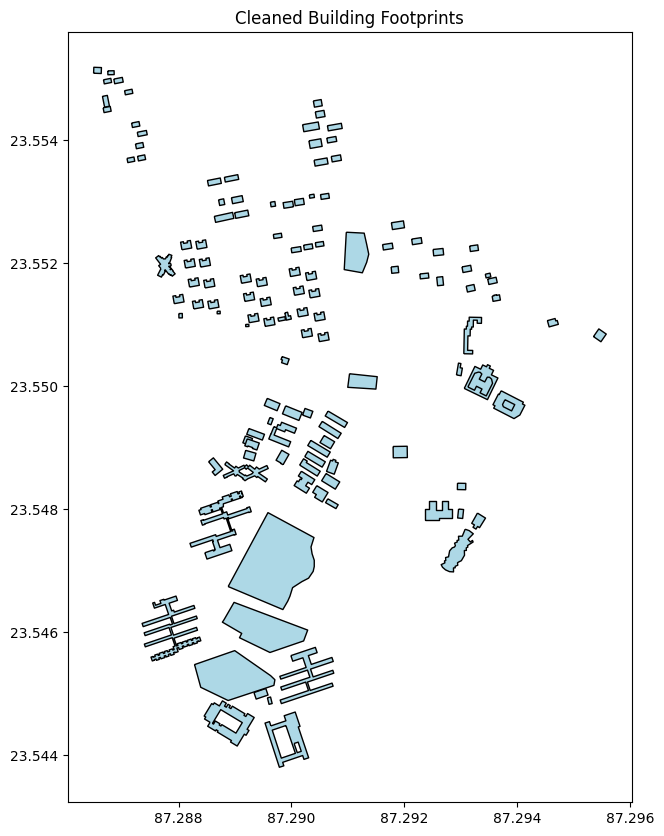

In [10]:
import matplotlib.pyplot as plt
import folium

# Static visualization
gdf.plot(figsize=(10, 10), color='lightblue', edgecolor='black')
plt.title("Cleaned Building Footprints")
plt.show()

# Interactive map
m = folium.Map(location=[23.5204, 87.3119], zoom_start=14)

# Convert 'osm_timestamp' to string before creating GeoJson
gdf['osm_timestamp'] = gdf['osm_timestamp'].astype(str)

folium.GeoJson(gdf).add_to(m)
m

In [11]:
output_file = '/content/cleaned_buildings.geojson'
gdf.to_file(output_file, driver='GeoJSON')

# Download the cleaned file
from google.colab import files
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Converting geojson to image using rasterio library

In [12]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 45.2 MB/s eta 0:00:00


In [13]:
import geopandas as gpd
import rasterio
from rasterio.features import geometry_mask
import numpy as np
from PIL import Image
from rasterio.transform import from_bounds # Import from_bounds

# Load the GeoJSON file
gdf = gpd.read_file("/content/drive/MyDrive/geoAI/OSM_Project.geojson")

# Set the CRS to match the image output (optional)
gdf = gdf.to_crs(epsg=3857)

# Create a bounding box to define the image dimensions (size of the map)
minx, miny, maxx, maxy = gdf.total_bounds
width = int(maxx - minx)
height = int(maxy - miny)

# Rasterize footprints (make sure the geometry column is polygons)
shapes = list(zip(gdf.geometry, [1] * len(gdf)))

# Create the image mask for buildings
raster = np.zeros((height, width), dtype=np.uint8)
# Create an affine transformation using from_bounds
transform = from_bounds(minx, miny, maxx, maxy, width, height)
for shape, value in shapes:
    # Pass the calculated transform to geometry_mask
    mask = geometry_mask([shape], transform=transform, invert=True, out_shape=(height, width))
    raster[mask] = value

# Convert to an image
image = Image.fromarray(raster)
image.show()

# Resize to a standard size (e.g., 128x128 for CNN input)
image = image.resize

In [14]:
# Display the 'other_tags' column to inspect its structure
print(gdf['other_tags'].head())

0    "building"=>"yes","name"=>"Preetilata Hall Of ...
1    "building"=>"university","building:levels"=>"3...
2    "building"=>"yes","name"=>"Hall 10","tourism"=...
3    "building"=>"yes","name"=>"Shri Aurobindo hall...
4    "building"=>"yes","name"=>"Doctor Meghnad Saha...
Name: other_tags, dtype: object


In [15]:
def parse_other_tags(tags_str):
    tags = {}
    if isinstance(tags_str, str):
        # Split by ', ' first, then by '=>'
        for item in tags_str.split(","):
            key_value = item.split("=>")
            if len(key_value) == 2:  # Ensure there are both a key and a value
                key = key_value[0].strip().replace('"', '')  # Remove extra quotes
                value = key_value[1].strip().replace('"', '')
                tags[key] = value
    return tags

# Apply the parsing function to the 'other_tags' column
gdf['parsed_tags'] = gdf['other_tags'].apply(parse_other_tags)

# Check the parsed tags to verify
print(gdf['parsed_tags'].head())


0    {'building': 'yes', 'name': 'Preetilata Hall O...
1    {'building': 'university', 'building:levels': ...
2    {'building': 'yes', 'name': 'Hall 10', 'touris...
3    {'building': 'yes', 'name': 'Shri Aurobindo ha...
4    {'building': 'yes', 'name': 'Doctor Meghnad Sa...
Name: parsed_tags, dtype: object


# Labelling the buildings to feed to the classifier

In [17]:
# Label buildings based on the presence of the 'building' key
gdf['label'] = gdf['parsed_tags'].apply(lambda x: 1 if x.get('building', 'no') == 'yes' else 0)

# Check the labels
print(gdf[['parsed_tags', 'label']])


                                           parsed_tags  label
0    {'building': 'yes', 'name': 'Preetilata Hall O...      1
1    {'building': 'university', 'building:levels': ...      0
2    {'building': 'yes', 'name': 'Hall 10', 'touris...      1
3    {'building': 'yes', 'name': 'Shri Aurobindo ha...      1
4    {'building': 'yes', 'name': 'Doctor Meghnad Sa...      1
..                                                 ...    ...
147                              {'leisure': 'garden'}      0
148                              {'leisure': 'garden'}      0
149                                {'leisure': 'park'}      0
150                                {'natural': 'wood'}      0
151  {'leisure': 'park', 'name': 'Dr B.R Ambedkar S...      0

[152 rows x 2 columns]


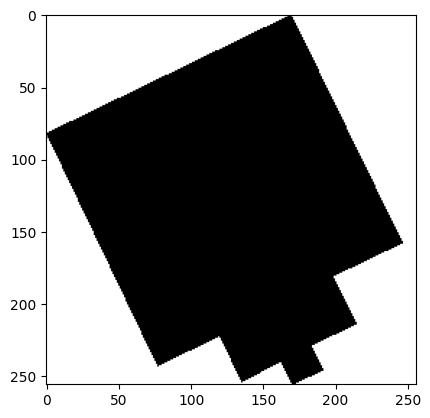

In [18]:
from shapely.geometry import shape
from PIL import Image, ImageDraw
import numpy as np

def create_image_from_geometry(geometry, size=(256, 256)):
    # Create a blank white image
    img = Image.new("1", size, color=1)  # Mode "1" is 1-bit pixels (black and white)
    draw = ImageDraw.Draw(img)

    # Get geometry bounds
    minx, miny, maxx, maxy = geometry.bounds

    # Calculate scale factor to fit geometry within image size
    x_scale = size[0] / (maxx - minx)
    y_scale = size[1] / (maxy - miny)
    scale = min(x_scale, y_scale)  # Preserve aspect ratio

    # Scale and translate coordinates
    def transform_coords(coords):
        return [(int((x - minx) * scale), int((y - miny) * scale)) for x, y in coords]

    # Draw the geometry on the image
    if geometry.geom_type == 'Polygon':
        coords = list(geometry.exterior.coords)
        draw.polygon(transform_coords(coords), outline=0, fill=0)
    elif geometry.geom_type == 'MultiPolygon':
        for poly in geometry.geoms:
            coords = list(poly.exterior.coords)
            draw.polygon(transform_coords(coords), outline=0, fill=0)

    return np.array(img)  # Return image as a numpy array

# Example: Create an image for the first building footprint
building_geometry = gdf.iloc[0]['geometry']  # Assuming it's a valid geometry
building_image = create_image_from_geometry(building_geometry)

# Visualize the image
import matplotlib.pyplot as plt
plt.imshow(building_image, cmap='gray')
plt.show()

# Binary Classification using CNN in Pytorch

In [19]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms

class BuildingDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
          image = image.astype(np.uint8) * 255
          image = self.transform(image)

        return image, label

# Create lists of images and labels
images = [create_image_from_geometry(geom) for geom in gdf['geometry']]  # List of images
labels = gdf['label'].tolist()  # Corresponding labels (0 or 1)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define transformations (e.g., normalize images)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((128, 128)),  # Resize to a fixed size
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [0, 1]
])

# Create datasets
train_dataset = BuildingDataset(X_train, y_train, transform=transform)
val_dataset = BuildingDataset(X_val, y_val, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


# Creating Dataset and DataLoader

In [35]:
import torch.nn as nn
import torch.optim as optim

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Calculate the correct input size for fc1 dynamically
        # Create a dummy input tensor with the expected shape
        dummy_input = torch.randn(1, 1, 128, 128)
        # Pass the dummy input through the convolutional layers
        dummy_output = self.conv3(self.conv2(self.conv1(dummy_input)))
        # Get the flattened size of the output
        fc1_input_size = dummy_output.view(1, -1).size(1)

        # Define fc1 with the calculated input size
        self.fc1 = nn.Linear(fc1_input_size, 128)

        self.fc2 = nn.Linear(128, 1)  # Binary classification

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.ReLU()(self.conv2(x))
        x = nn.ReLU()(self.conv3(x))

        # Flatten the output for the fully connected layer
        x = x.view(x.size(0), -1)

        x = nn.ReLU()(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Sigmoid for binary classification
        return x

# Initialize the model
model = CNNModel()

# Model Training

In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        # Move images and labels to the GPU (if available)
        images = images.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        labels = labels.view(-1, 1).float()  # Reshape labels for binary classification
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        predicted = (outputs > 0.5).float()  # Threshold at 0.5 for binary classification
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct / total * 100

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")


Epoch [1/5], Loss: 12.9936, Accuracy: 65.29%
Epoch [2/5], Loss: 15.8438, Accuracy: 83.47%
Epoch [3/5], Loss: 16.0625, Accuracy: 83.47%
Epoch [4/5], Loss: 15.6250, Accuracy: 83.47%
Epoch [5/5], Loss: 17.1562, Accuracy: 83.47%


# Model Evaluation

In [33]:
model.eval()
val_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        labels = labels.view(-1, 1).float()
        loss = criterion(outputs, labels)

        val_loss += loss.item()

        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_loss /= len(val_loader)
val_accuracy = correct / total * 100
print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.2f}%")


Validation Loss: 16.1290, Accuracy: 83.87%


In [34]:
# Save the model
torch.save(model.state_dict(), 'cnn_model.pth')
